In [18]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px

In [19]:
table = pd.read_csv('./Data/sample_for_cluster_algorithm.csv')

table

,avg_amount_tran,credit_balance,savings_balance,checking_balance
0,0.297372,-0.828713,0.909864,-0.441869
1,1.024934,-0.404047,2.188932,-0.429398
2,0.357154,0.482733,-0.716656,-0.502851
3,-0.812129,-0.852999,-0.557505,4.312616
4,-0.077075,1.027019,-0.699007,1.495577
...,...,...,...,...
567,0.154582,0.361303,-0.500657,-0.569907
568,-1.449947,-0.851785,-0.716656,-0.569907
569,-1.431431,-0.852999,2.434505,-0.569907
570,-0.490472,-0.851785,0.041324,2.457689


In [20]:
#reducing to 2 dimensions
pca_table_init = PCA(n_components=2)
pca_table_init.fit(table)
pca_table = pca_table_init.transform(table)

pca_table

array([[-0.241076  ,  1.15104553],
       [ 0.78967792,  2.24875111],
       [ 0.12750567, -0.72588027],
       ...,
       [-1.10891266,  2.64594108],
       [ 0.2512349 , -0.14717593],
       [-0.19795381,  3.21980582]])

In [22]:
#initializing the centroids
np.random.seed(42)
centroids = [pca_table[0]]
k = 4

for _ in range(1, k):
    dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in pca_table])
    probs = dist_sq/dist_sq.sum()
    cumulative_probs = probs.cumsum()
    r = np.random.rand()
        
    for j, p in enumerate(cumulative_probs):
        if r < p:
            i = j
            break
    centroids.append(pca_table[i])

centroids

[array([-0.241076  ,  1.15104553]),
 array([5.52108525, 2.85259468]),
 array([ 0.08473547, -0.52399473]),
 array([-0.85616994, -0.66777443])]

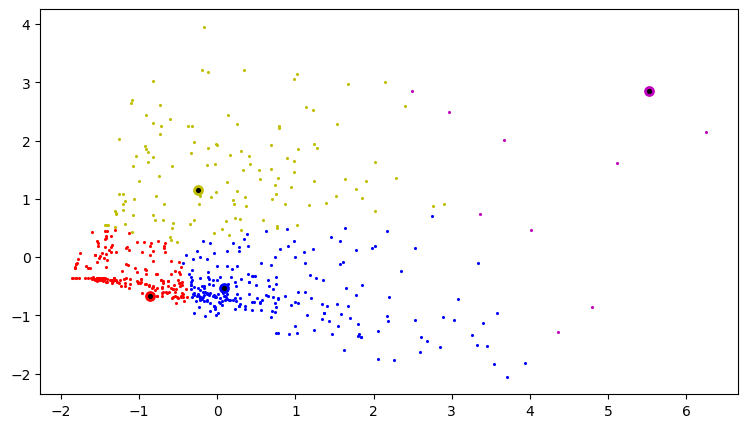

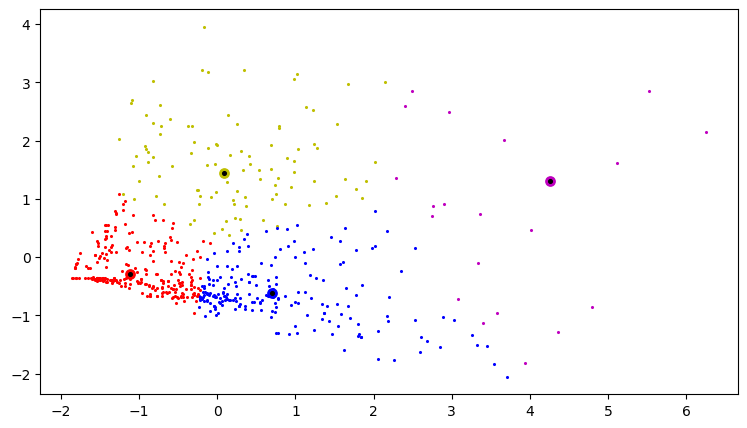

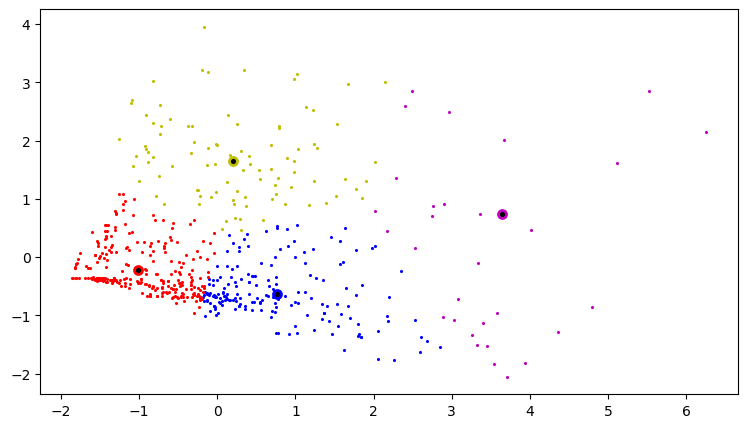

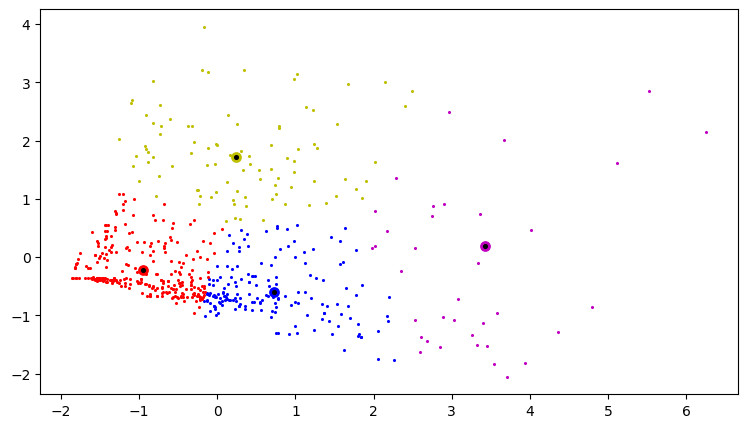

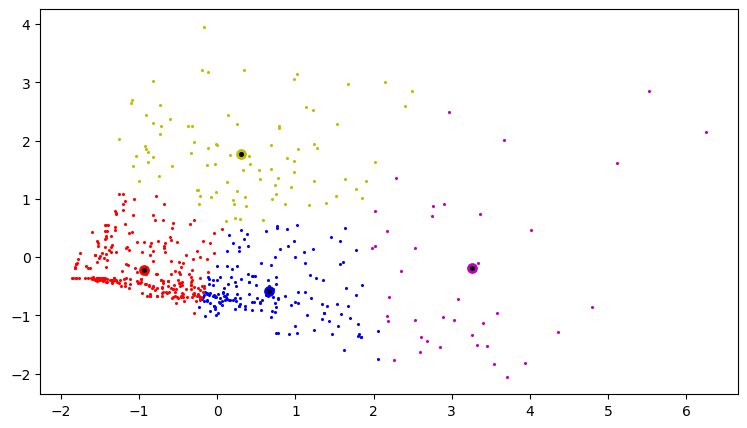

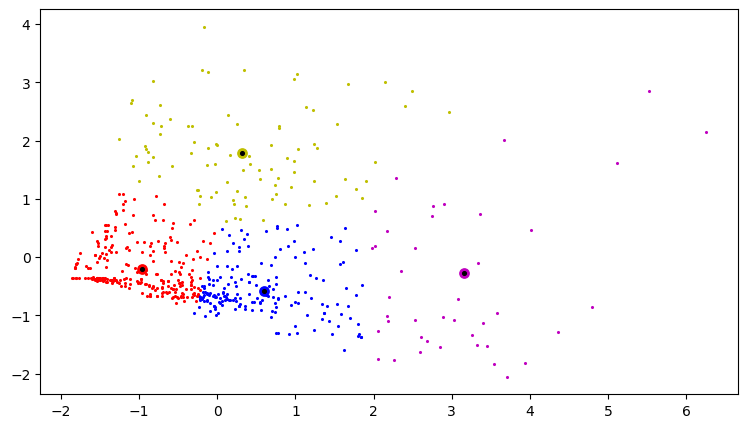

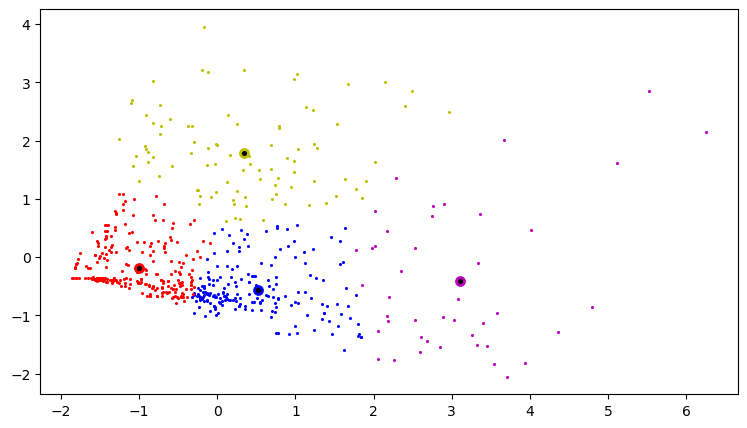

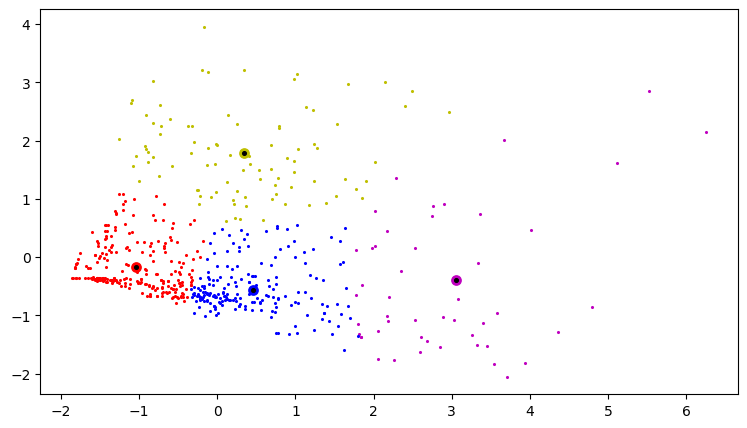

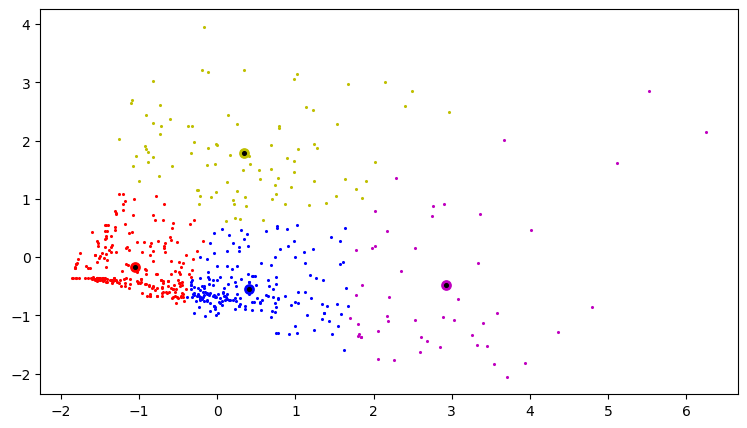

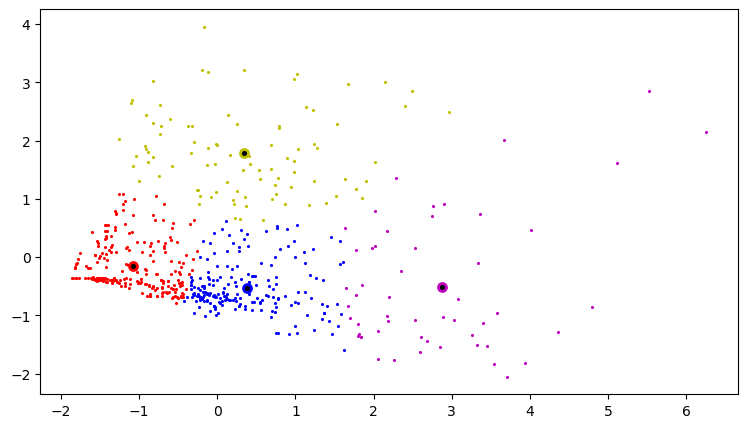

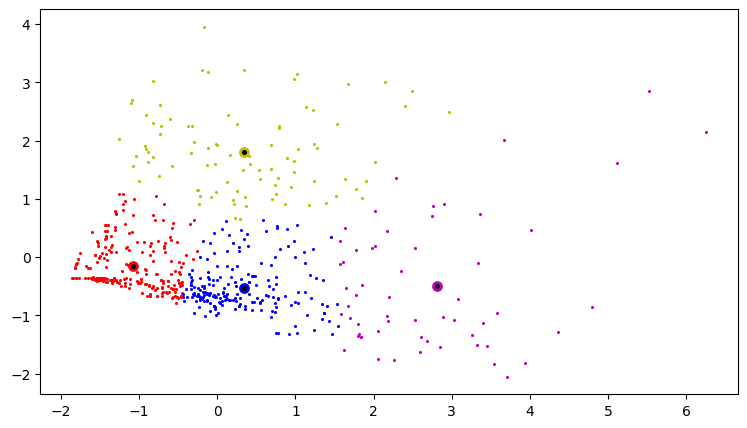

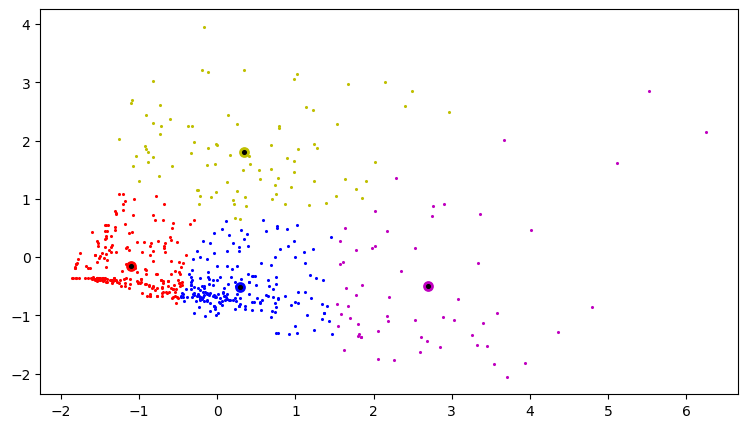

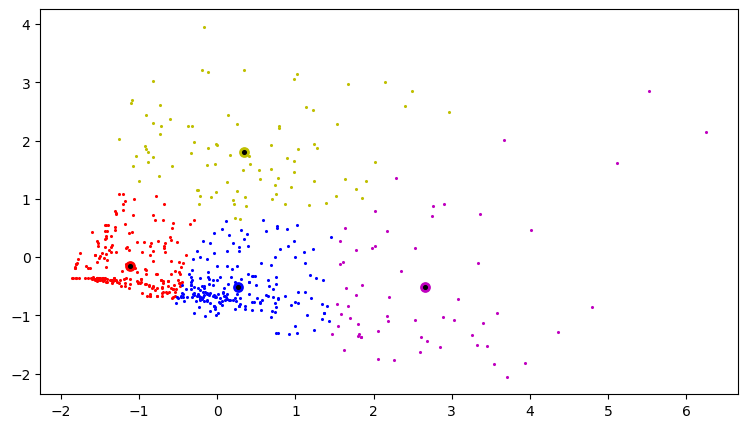

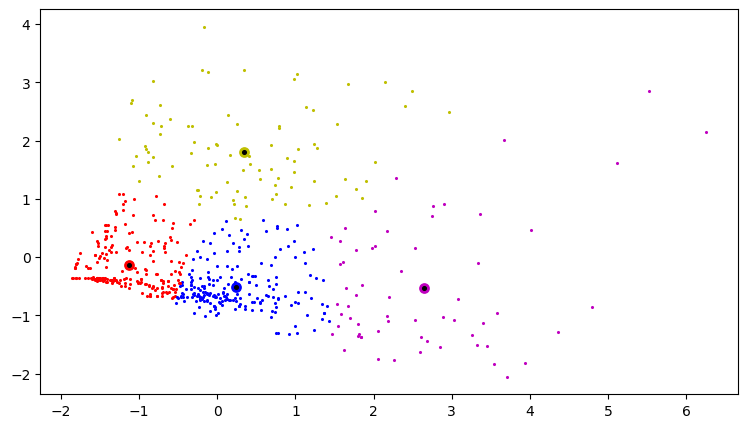

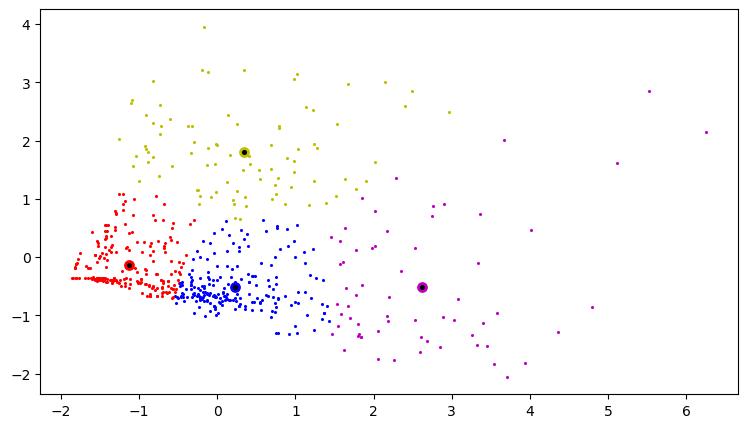

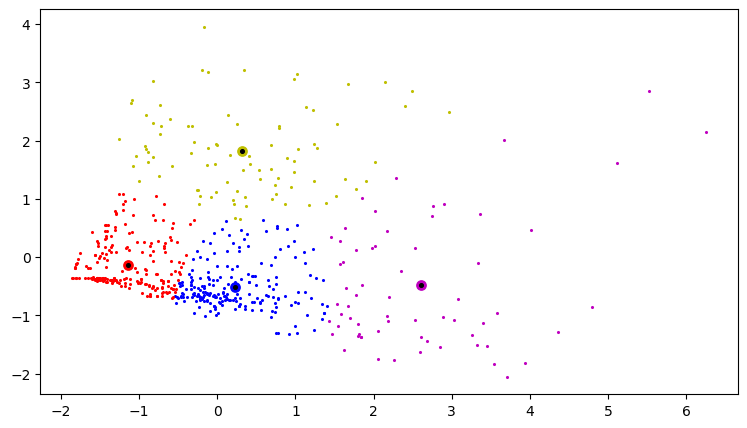

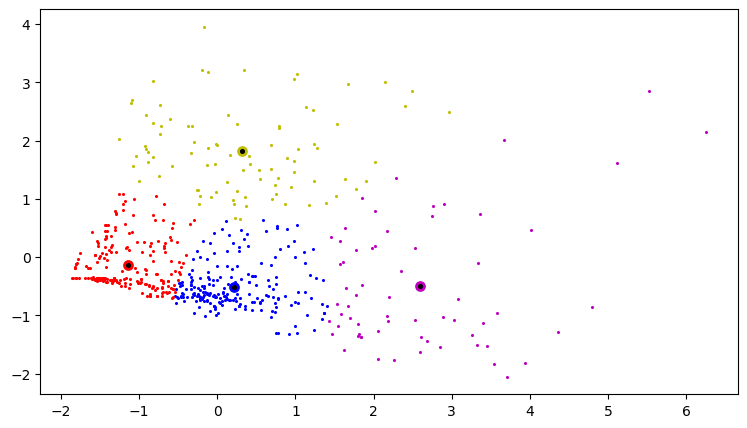

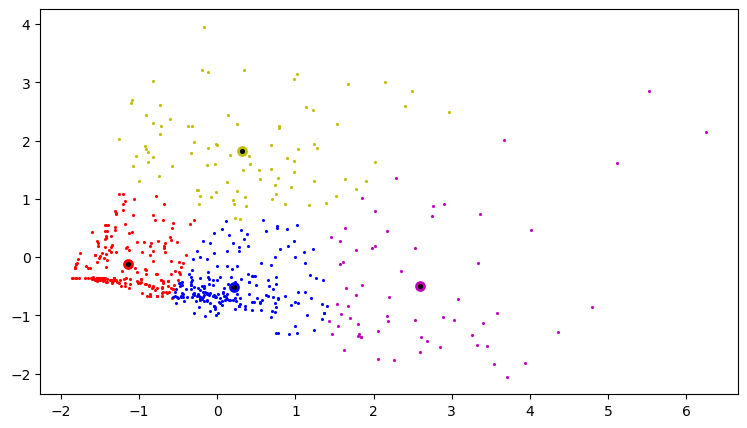

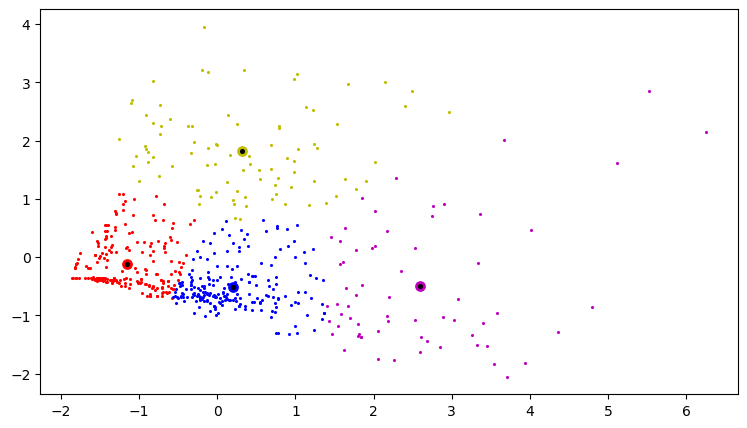

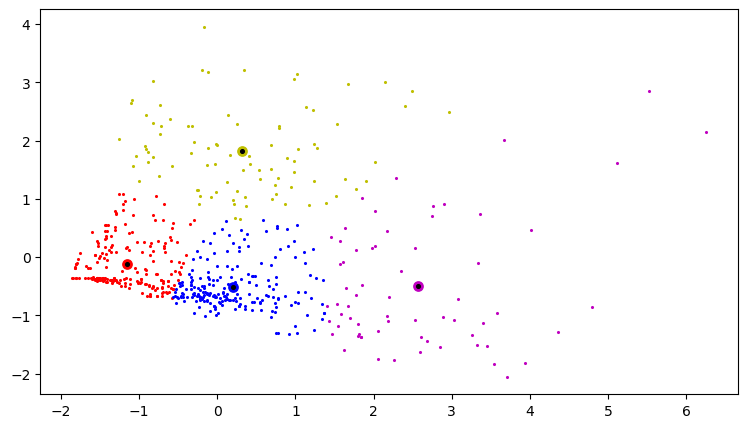

In [23]:
colors = {0:'y', 1:'m', 2:'b', 3:'r', 4:'k', 5:'c', 6:'darkgreen', 7:'g'}

for c in range(20):
    #computing the clusters
    centroids_result = []
    for i in pca_table:
        diff = []
        for j in centroids:
            diff.append(np.linalg.norm(i - j))
        centroids_result.append(np.where(diff == min(diff))[0][0])

    #ploting iteration
    plt.figure(figsize=(9,5))
        
    #clusters
    for i in range(len(pca_table)):
        plt.scatter(pca_table[i][0],
                    pca_table[i][1], 
                    c = colors[centroids_result[i]], 
                    s = 1.5)
    
    #centroids
    j = 0
    for i in range(k):
        plt.scatter(centroids[i][0],
                    centroids[i][1], 
                    c = colors[j], 
                    s = 45)
        j += 1
    
    for i in range(k):
        plt.scatter(centroids[i][0],
                    centroids[i][1], 
                    c = 'k', 
                    s = 7)
    plt.savefig('./Data/image'+str(c)+'.jpeg')
    plt.show()
          
    #replacing centroids by new means
    centroids = []
    for i in set(centroids_result):
        temp = []
        c = 0
        for j in centroids_result:
            if (j == i):
                temp.append(pca_table[c]) 
            c += 1
        centroids.append(np.mean(temp, axis=0))

    

